<a href="https://www.kaggle.com/code/aabdollahii/maternal-health-and-high-risk-pregnancy?scriptVersionId=253341856" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://www.kaggle.com/code/aabdollahii/maternal-health-and-high-risk-pregnancy?scriptVersionId=253296243" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1.data path

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/maternal-health-and-high-risk-pregnancy-dataset/Dataset - Updated.csv


# 2. read and see data

In [2]:
df = pd.read_csv("/kaggle/input/maternal-health-and-high-risk-pregnancy-dataset/Dataset - Updated.csv")

In [3]:
df.shape

(1205, 12)

In [4]:
df.describe()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate
count,1205.000000,1200.000000,1201.000000,1203.000000,1205.000000,1187.000000,1203.000000,1203.000000,1205.000000,1205.00000,1203.000000
mean,27.482988,116.819167,77.166528,7.501064,98.395851,23.315080,0.175395,0.288446,0.117842,0.33444,75.817124
std,9.196765,18.715502,14.305148,3.049522,1.088363,3.875682,0.380463,0.453228,0.322555,0.47199,7.227338
min,10.000000,70.000000,40.000000,3.000000,97.000000,0.000000,0.000000,0.000000,0.000000,0.00000,58.000000
25%,21.000000,100.000000,65.000000,6.000000,98.000000,20.450000,0.000000,0.000000,0.000000,0.00000,70.000000
50%,25.000000,120.000000,80.000000,6.900000,98.000000,23.000000,0.000000,0.000000,0.000000,0.00000,76.000000
75%,31.000000,130.000000,90.000000,7.900000,98.000000,25.000000,0.000000,1.000000,0.000000,1.00000,80.000000
max,65.000000,200.000000,140.000000,19.000000,103.000000,37.000000,1.000000,1.000000,1.000000,1.00000,92.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1205 non-null   int64  
 1   Systolic BP             1200 non-null   float64
 2   Diastolic               1201 non-null   float64
 3   BS                      1203 non-null   float64
 4   Body Temp               1205 non-null   int64  
 5   BMI                     1187 non-null   float64
 6   Previous Complications  1203 non-null   float64
 7   Preexisting Diabetes    1203 non-null   float64
 8   Gestational Diabetes    1205 non-null   int64  
 9   Mental Health           1205 non-null   int64  
 10  Heart Rate              1203 non-null   float64
 11  Risk Level              1187 non-null   object 
dtypes: float64(7), int64(4), object(1)
memory usage: 113.1+ KB


# 3. Data cleaning

handle missing values

In [6]:
print(df.isnull().sum())


Age                        0
Systolic BP                5
Diastolic                  4
BS                         2
Body Temp                  0
BMI                       18
Previous Complications     2
Preexisting Diabetes       2
Gestational Diabetes       0
Mental Health              0
Heart Rate                 2
Risk Level                18
dtype: int64


As we can see, We dont have lots of missing values and we can drop all of them. But we don't do that 

As we can see, no Nan and we are happy

In [7]:
df = df.dropna(subset=['Risk Level'])
# we have to do that for risk level only 

numeric_features_df = df.select_dtypes(include=np.number)
num_cols = numeric_features_df.columns.tolist()

print("\nList of numeric feature names:")
print(num_cols)

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

print(df.isnull().sum())




List of numeric feature names:
['Age', 'Systolic BP', 'Diastolic', 'BS', 'Body Temp', 'BMI', 'Previous Complications', 'Preexisting Diabetes', 'Gestational Diabetes', 'Mental Health', 'Heart Rate']
Age                       0
Systolic BP               0
Diastolic                 0
BS                        0
Body Temp                 0
BMI                       0
Previous Complications    0
Preexisting Diabetes      0
Gestational Diabetes      0
Mental Health             0
Heart Rate                0
Risk Level                0
dtype: int64


# 4.EDA

lets see Quality of data again

In [8]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1187 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1187 non-null   int64  
 1   Systolic BP             1187 non-null   float64
 2   Diastolic               1187 non-null   float64
 3   BS                      1187 non-null   float64
 4   Body Temp               1187 non-null   int64  
 5   BMI                     1187 non-null   float64
 6   Previous Complications  1187 non-null   float64
 7   Preexisting Diabetes    1187 non-null   float64
 8   Gestational Diabetes    1187 non-null   int64  
 9   Mental Health           1187 non-null   int64  
 10  Heart Rate              1187 non-null   float64
 11  Risk Level              1187 non-null   object 
dtypes: float64(7), int64(4), object(1)
memory usage: 120.6+ KB
None


## 4.1  Data Quality Overview 

In [9]:
df.describe()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate
count,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000
mean,27.511373,116.851727,77.213142,7.515906,98.396799,23.335805,0.176917,0.289806,0.117944,0.335299,75.843302
std,9.238666,18.664290,14.262744,3.051976,1.089621,3.860819,0.381759,0.453864,0.322678,0.472294,7.220617
min,10.000000,70.000000,40.000000,3.000000,97.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000
25%,21.000000,100.000000,65.000000,6.000000,98.000000,21.000000,0.000000,0.000000,0.000000,0.000000,70.000000
50%,25.000000,120.000000,80.000000,6.900000,98.000000,23.000000,0.000000,0.000000,0.000000,0.000000,76.000000
75%,32.000000,130.000000,90.000000,7.950000,98.000000,25.000000,0.000000,1.000000,0.000000,1.000000,80.000000
max,65.000000,200.000000,140.000000,19.000000,103.000000,37.000000,1.000000,1.000000,1.000000,1.000000,92.000000


**What I understand from this data**
1. Age : 10 years old seems low for maternal age; might be data entry error. Most ages between 21-32, which is expected.
2. Systolic BP : Normal range, but 200 is very high (possible outlier, severe hypertension).
3. Diastolic : 140 is very high, 40 is low – both could be outliers. Normal DBP expected: 60–90.
4. BS (Blood Sugar) : Seems within plausible range, but 19 is high (possible case of diabetes).
* BMI = 0: Impossible; should be flagged/treated as missing.
* BS = 19: Very high (severe diabetes/hyperglycemia).
* Note : We have outlier in Age and Bmi.

## 4.2 outlier detection 

In [10]:
#outlier detection 
# Set plausible ranges in a dict
ranges = {
    'Age': (15, 49),
    'Systolic BP': (80, 180),
    'Diastolic': (50, 120),
    'BS': (3, 16),
    'Body Temp': (95, 102),
    'BMI': (12, 45),
    'Heart Rate': (60, 110)
}

# Replace outliers with NaN
for col, (min_val, max_val) in ranges.items():
    df.loc[(df[col] < min_val) | (df[col] > max_val), col] = np.nan

# Show how many were changed
print(df.isnull().sum())


Age                       66
Systolic BP               17
Diastolic                 14
BS                        29
Body Temp                  6
BMI                        1
Previous Complications     0
Preexisting Diabetes       0
Gestational Diabetes       0
Mental Health              0
Heart Rate                 3
Risk Level                 0
dtype: int64


We have a lot of outleir. We need to use median 


In [11]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

print(df.isnull().sum())



Age                       0
Systolic BP               0
Diastolic                 0
BS                        0
Body Temp                 0
BMI                       0
Previous Complications    0
Preexisting Diabetes      0
Gestational Diabetes      0
Mental Health             0
Heart Rate                0
Risk Level                0
dtype: int64


In [12]:
df.shape

(1187, 12)

## 4.3 Univariate Distributions

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


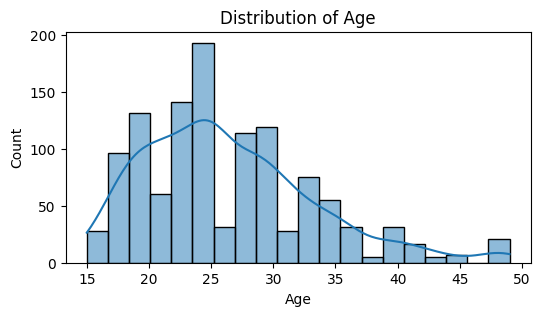

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


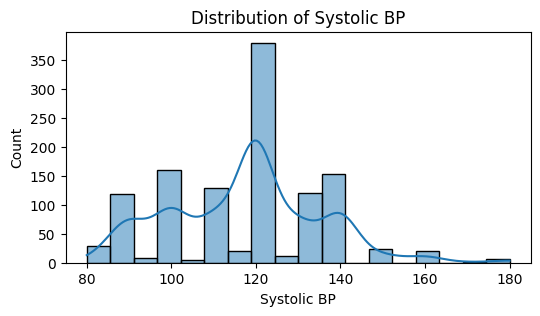

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


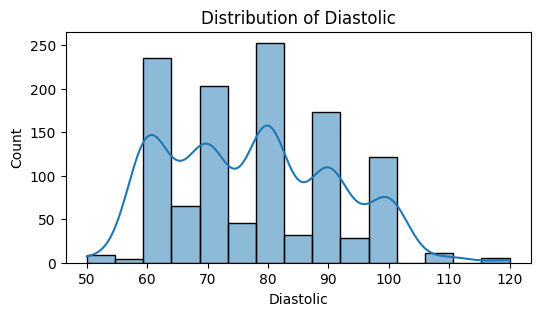

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


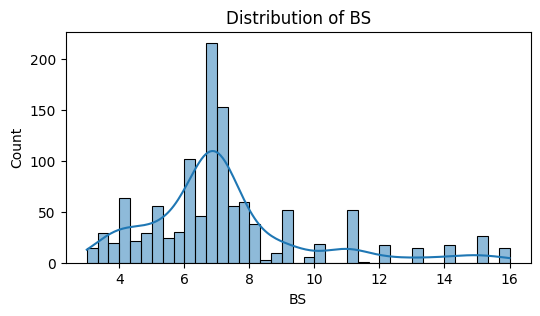

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


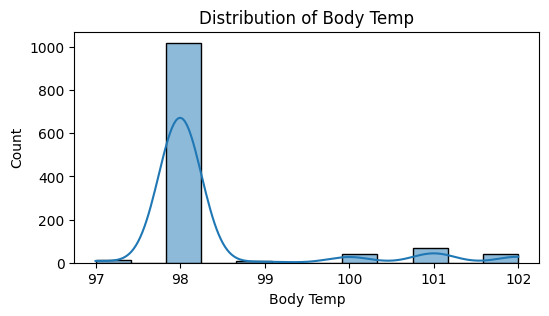

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


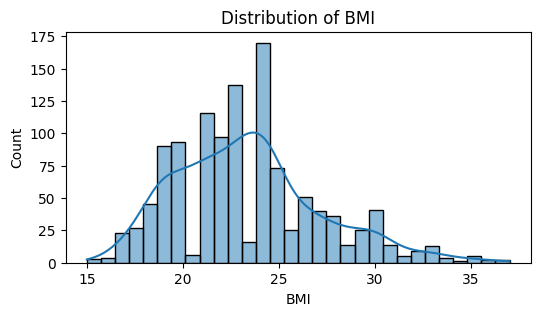

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


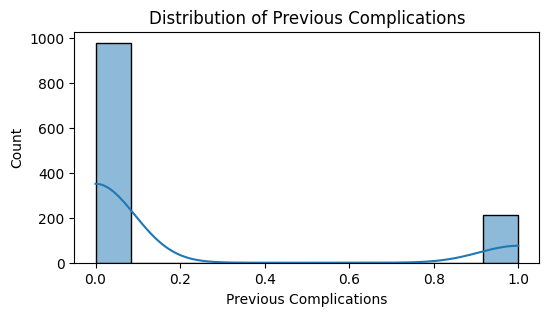

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


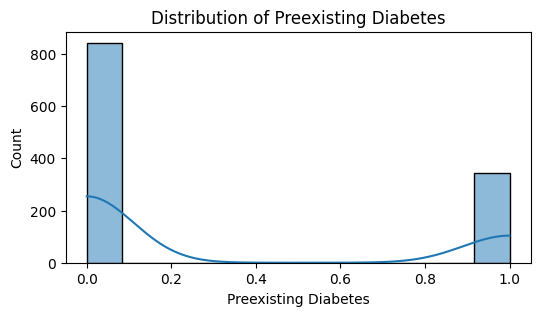

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


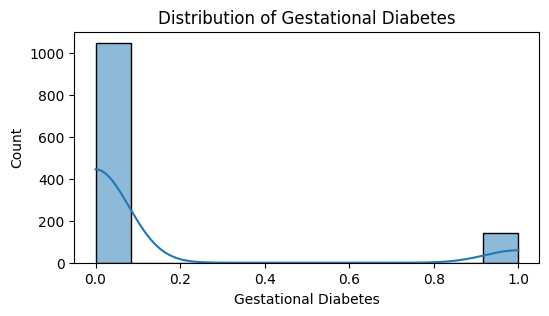

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


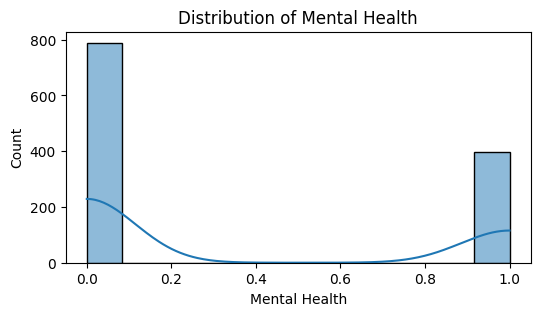

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


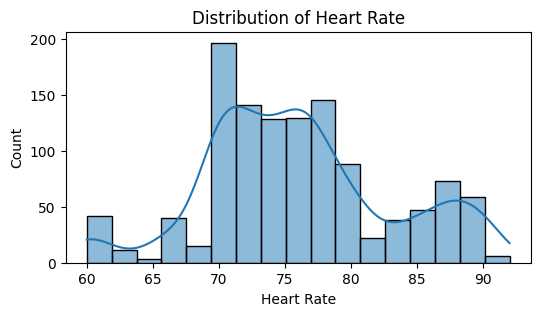

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## 4.4 Risk Level Distro

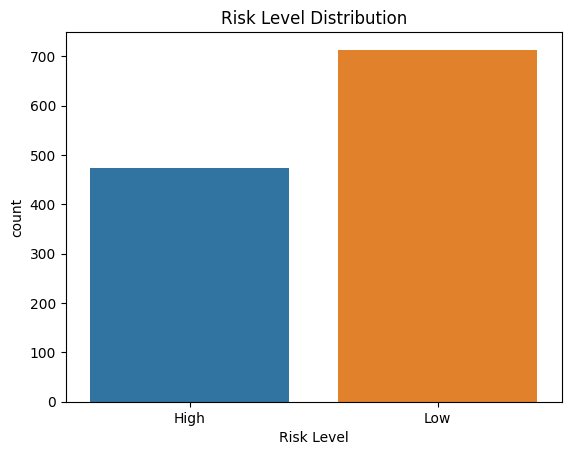

In [14]:
import seaborn as sns

sns.countplot(x='Risk Level', data=df)
plt.title('Risk Level Distribution')
plt.show()

The class distribution is reasonably balanced (not heavily imbalanced), which is great for modeling.

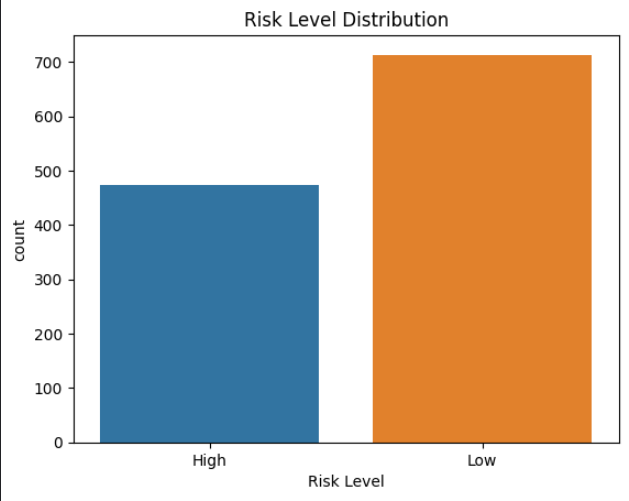

## 4.5 Numerical Features vs. Risk Level

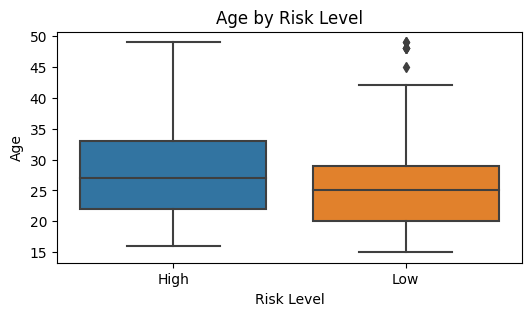

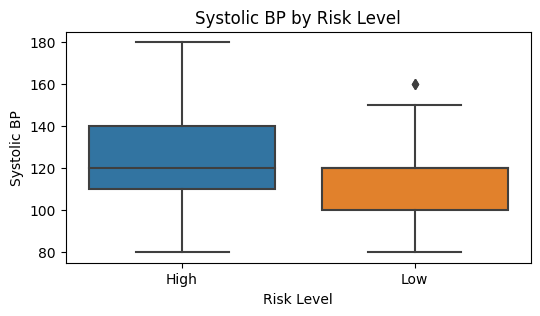

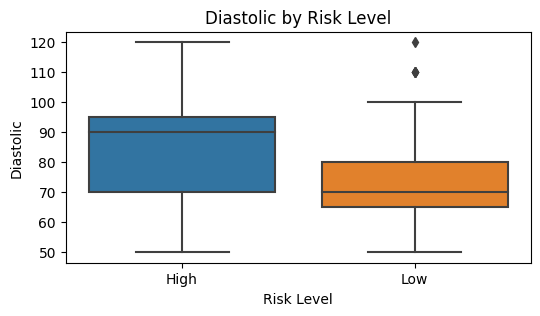

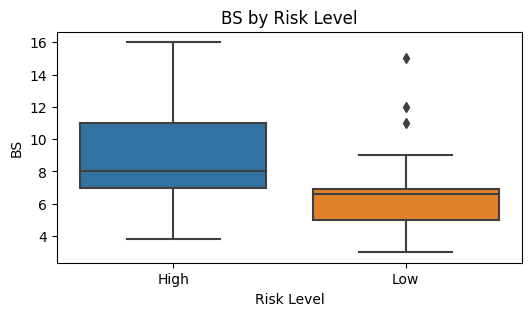

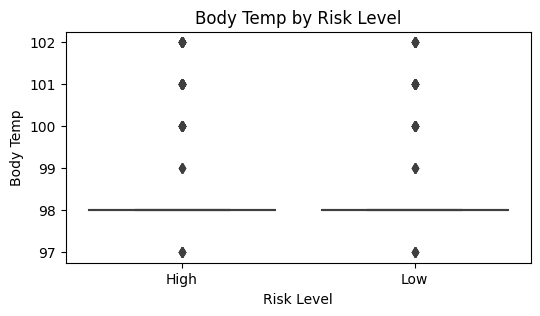

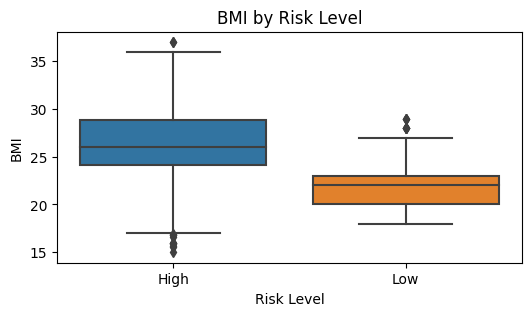

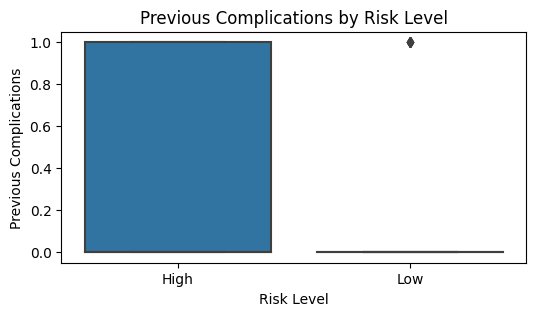

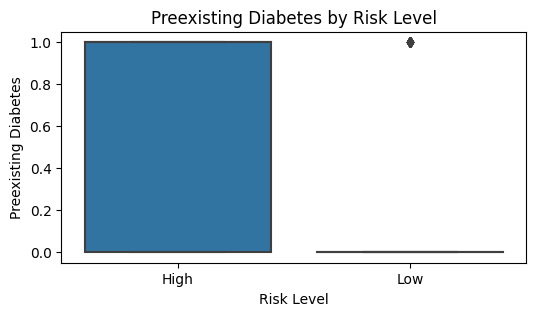

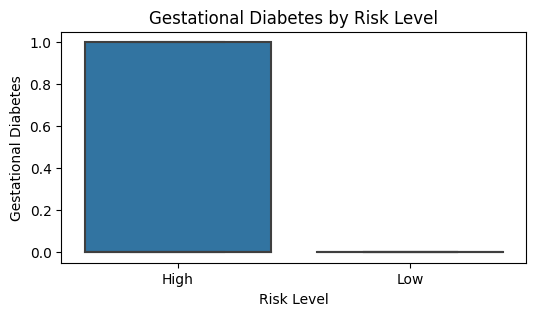

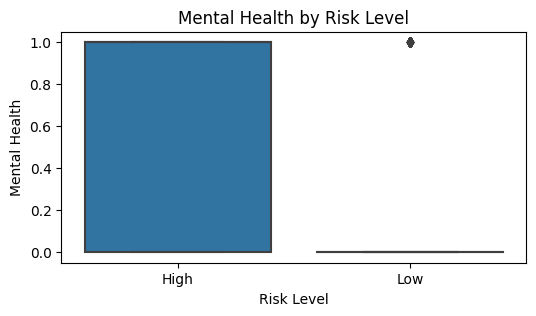

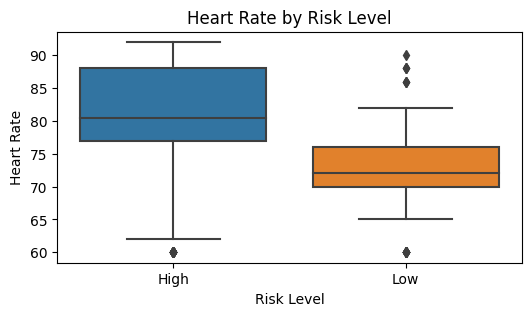

In [15]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='Risk Level', y=col, data=df)
    plt.title(f'{col} by Risk Level')
    plt.show()

Features such as blood sugar, BMI, blood pressure, previous complications, diabetes (preexisting and gestational), heart rate, age, and mental health status all show clear separation between risk levels and are likely to be important predictors for risk classification. Body temperature does not seem to provide additional discriminative power between groups.

## 4.6 Correlation Heatmap

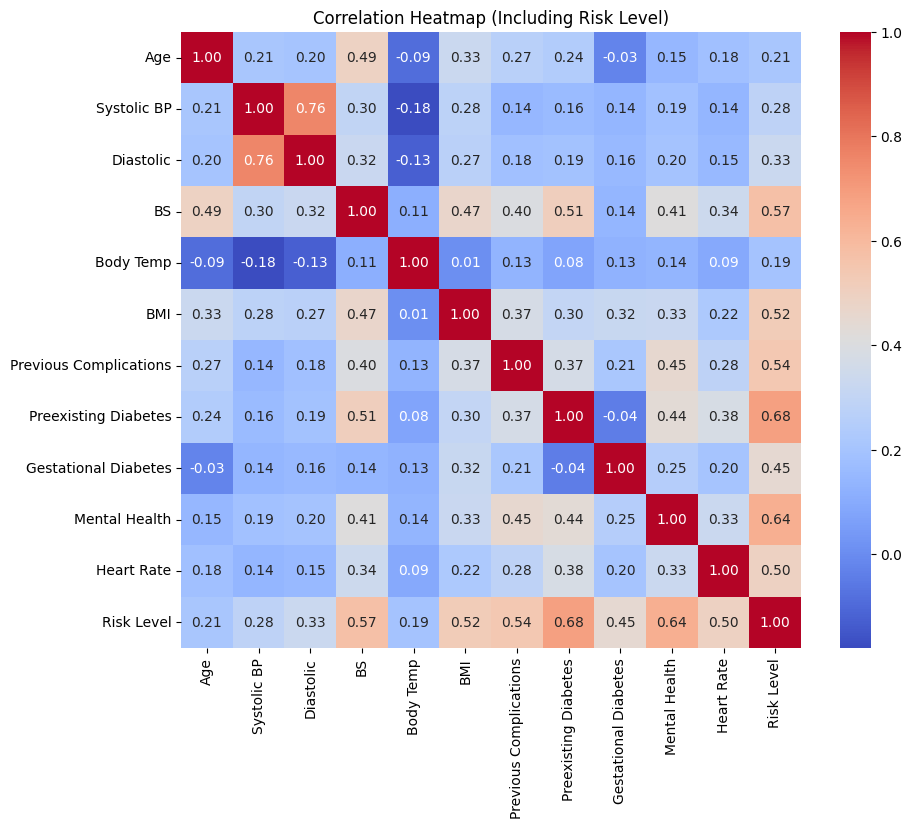

In [16]:
# We are late but we need to do that 
df['Risk Level'] = df['Risk Level'].map({'Low': 0, 'High': 1})

corr_matrix = df.corr()


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Including Risk Level)")
plt.show()


Highest positive correlations with Risk Level:
Preexisting Diabetes: 0.68
Previous Complications: 0.54
Gestational Diabetes: 0.45
Mental Health: 0.64
Blood Sugar (BS): 0.57
BMI: 0.52
Heart Rate: 0.50
These values suggest these features have the strongest direct association with being in the high-risk group.



# 5.feature engineering

In [17]:
df.columns

Index(['Age', 'Systolic BP', 'Diastolic', 'BS', 'Body Temp', 'BMI',
       'Previous Complications', 'Preexisting Diabetes',
       'Gestational Diabetes', 'Mental Health', 'Heart Rate', 'Risk Level'],
      dtype='object')

In [18]:
import numpy as np

# --- Interaction Features ---
df['BP_Product'] = df['Systolic BP'] * df['Diastolic']

df['BS_BMI'] = df['BS'] * df['BMI']

# --- Binary/Flag Features ---
df['High_BP'] = ((df['Systolic BP'] >= 140) | (df['Diastolic'] >= 90)).astype(int)  # Common hypertension thresholds
df['High_BS'] = (df['BS'] >= 7.0).astype(int)  # Adjust threshold to your data's BS units
df['Obese'] = (df['BMI'] >= 30).astype(int)  # Standard for obesity

# --- Aggregation Features ---
df['Any_Diabetes'] = ((df['Preexisting Diabetes'] == 1) | (df['Gestational Diabetes'] == 1)).astype(int)
df['Complicated_History'] = ((df['Previous Complications'] == 1) | (df['Mental Health'] == 1)).astype(int)

# --- Ratios & Differences ---
df['Pulse_Pressure'] = df['Systolic BP'] - df['Diastolic']
df['BMI_per_Age'] = df['BMI'] / df['Age']

# --- Log Transformations for Skewed Features (Optional) ---
df['BMI_log'] = np.log(df['BMI'] + 1)
df['BS_log'] = np.log(df['BS'] + 1)


# 6.Modeling and prediction


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       143
           1       0.97      0.97      0.97        95

    accuracy                           0.97       238
   macro avg       0.97      0.97      0.97       238
weighted avg       0.97      0.97      0.97       238

Accuracy: 0.975 | F1: 0.968 | ROC-AUC: 0.997

=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       143
           1       0.97      1.00      0.98        95

    accuracy                           0.99       238
   macro avg       0.98      0.99      0.99       238
weighted avg       0.99      0.99      0.99       238

Accuracy: 0.987 | F1: 0.984 | ROC-AUC: 1.000

=== Gradient Boosting ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       0.99      0.99      0.99        95

    accuracy 

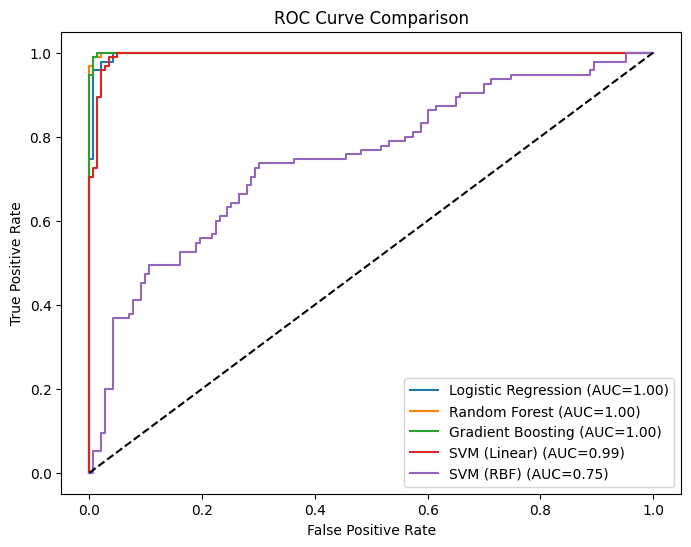


=== Model Comparison (Test Set) ===
                     Accuracy  F1-score   ROC-AUC
Logistic Regression  0.974790  0.968421  0.997203
Random Forest        0.987395  0.984456  0.999632
Gradient Boosting    0.991597  0.989474  0.999558
SVM (Linear)         0.970588  0.963731  0.994626
SVM (RBF)            0.714286  0.527778  0.746485


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    classification_report, 
    roc_auc_score, 
    roc_curve
)
import matplotlib.pyplot as plt

# ---- Step 1: Prepare Data ----
# List your features - include engineered ones!
features = [
    'Age', 'Systolic BP', 'Diastolic', 'BS', 'Body Temp', 'BMI',
    'Previous Complications', 'Preexisting Diabetes', 'Gestational Diabetes',
    'Mental Health', 'Heart Rate',
    # Engineered features:
    'BP_Product', 'BS_BMI', 'High_BP', 'High_BS', 'Obese', 'Any_Diabetes',
    'Complicated_History', 'Pulse_Pressure', 'BMI_per_Age', 'BMI_log', 'BS_log'
]

X = df[features]
y = df['Risk Level']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- Step 2: Define Models ----

models = {
    'Logistic Regression': LogisticRegression(max_iter=500, solver='liblinear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM (Linear)': SVC(kernel='linear', probability=True, random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=42)
}

results = {}

# ---- Step 3: Train, Predict, Evaluate ----

for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {acc:.3f} | F1: {f1:.3f} | ROC-AUC: {auc:.3f}')
    
    # Store for comparison
    results[name] = {
        'acc': acc, 'f1': f1, 'auc': auc,
        'y_prob': y_prob, 'fpr': None, 'tpr': None
    }

    # ROC curve points for plotting later
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    results[name]['fpr'] = fpr
    results[name]['tpr'] = tpr

# ---- Step 4: ROC Curve Visualization ----

plt.figure(figsize=(8,6))
for name, res in results.items():
    plt.plot(res['fpr'], res['tpr'], label=f"{name} (AUC={res['auc']:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve Comparison")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# ---- Step 5: Tabular Summary ----

print("\n=== Model Comparison (Test Set) ===")
summary = pd.DataFrame({
    model: [res['acc'], res['f1'], res['auc']] for model, res in results.items()
}, index=['Accuracy', 'F1-score', 'ROC-AUC'])
print(summary.T)


Tree-based models (Random Forest & Gradient Boosting) achieved nearly perfect discrimination between low and high-risk pregnancies (ROC-AUC ≈ 1.0). Key models also performed very well on F1-score and balanced accuracy, confirming the success of the feature selection and engineering process. SVM models, particularly with an RBF kernel, underperformed, highlighting that either linear relationships or tree-based splits best fit the data’s structure.

